![](diwali2.jpg)

# 1 Setting The Working Environment

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2 Importing The Dataset

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

# 3 Exploring Dataset

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int32')

## Gender

![](gender.avif)

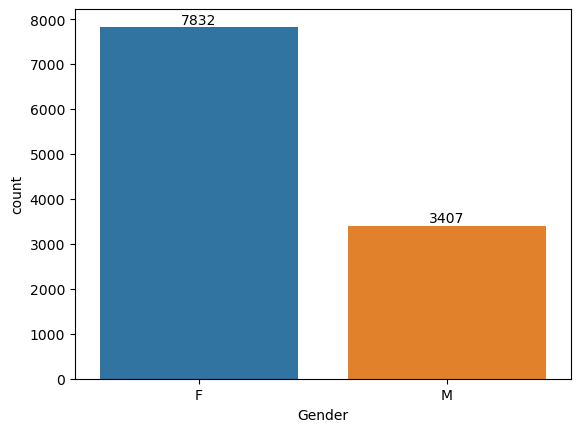

In [11]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

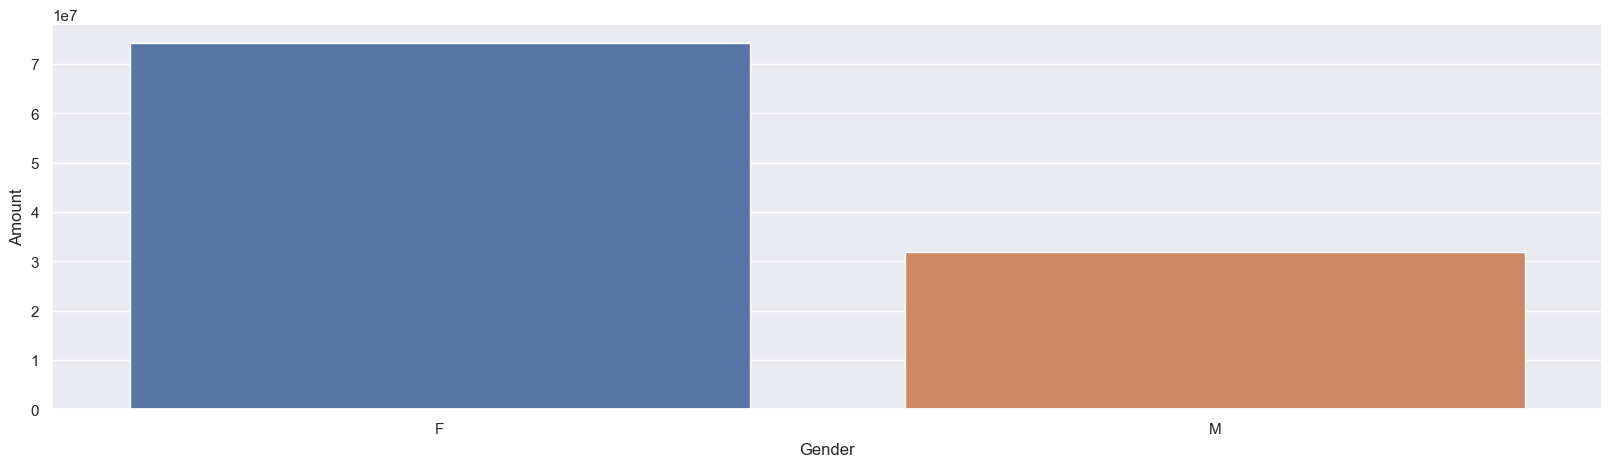

In [49]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)
plt.show()

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

## Age

![](age.jpg)

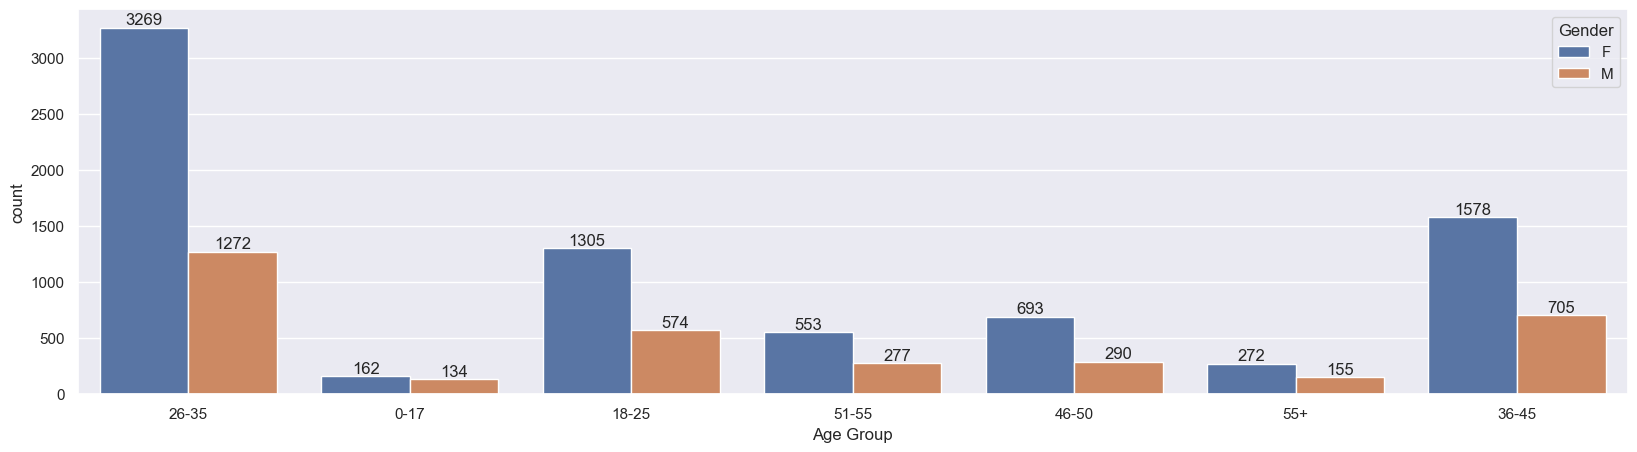

In [42]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

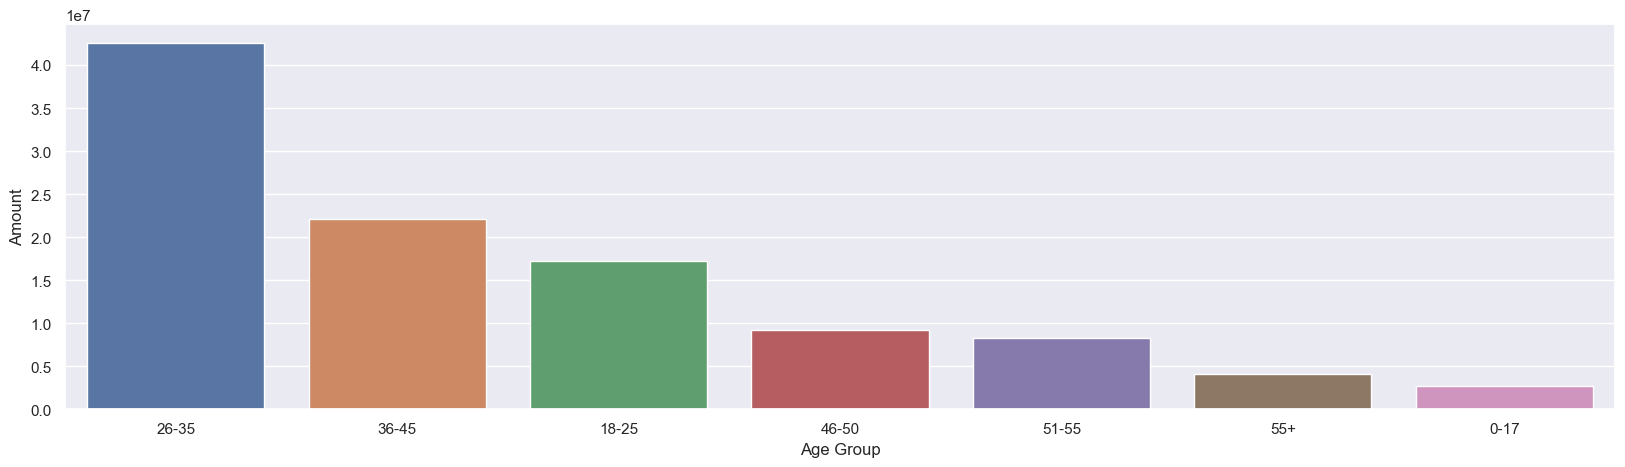

In [48]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
plt.show()

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

## State

![](state1.jpg)

![](state.jpeg)

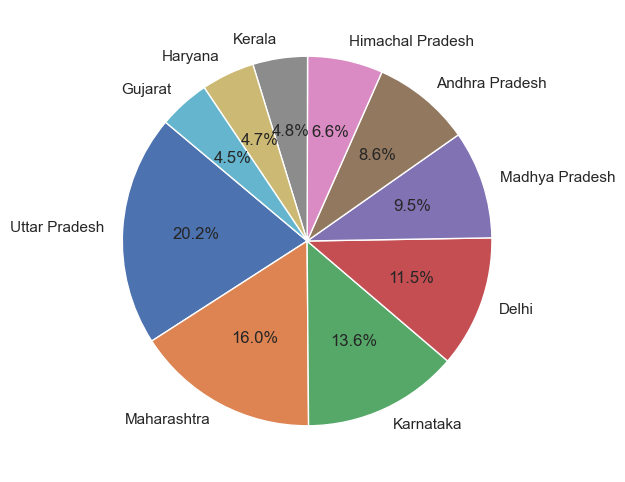

In [45]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

plt.figure(figsize=(10, 6))

plt.pie(sales_state['Orders'], labels=sales_state['State'], autopct='%1.1f%%', startangle=140)
plt.show()

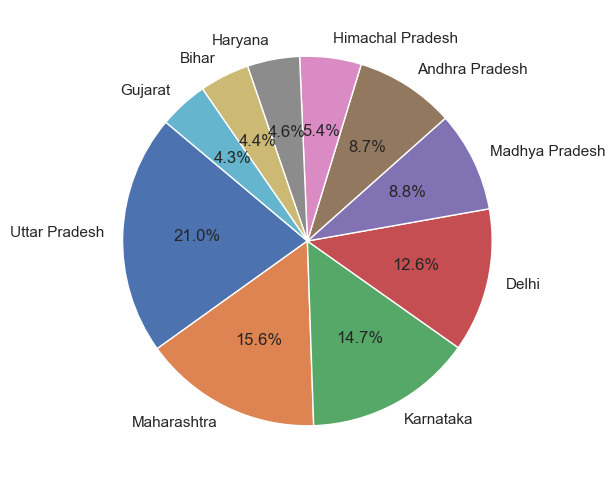

In [46]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(10, 6))

plt.pie(sales_state['Amount'], labels=sales_state['State'], autopct='%1.1f%%', startangle=140)
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


## Marital Status

![](state2.jpg)

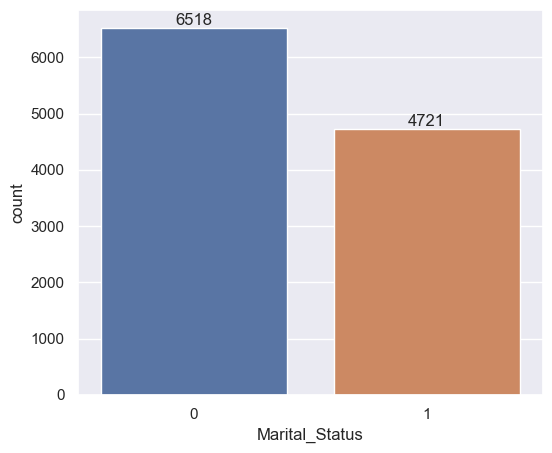

In [63]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

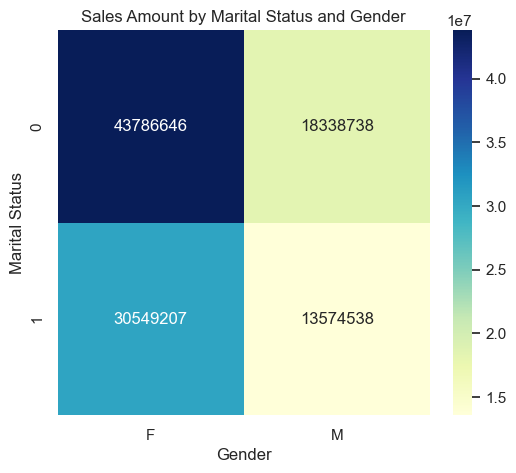

In [61]:
sales_state_pivot = df.pivot_table(index='Marital_Status', columns='Gender', values='Amount', aggfunc='sum')

sns.set(rc={'figure.figsize': (6, 5)})
sns.heatmap(sales_state_pivot, annot=True, fmt='.0f', cmap='YlGnBu')

plt.xlabel('Gender')
plt.ylabel('Marital Status')
plt.title('Sales Amount by Marital Status and Gender')

plt.show()


*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

## Occupation

![](occupation.jpg)

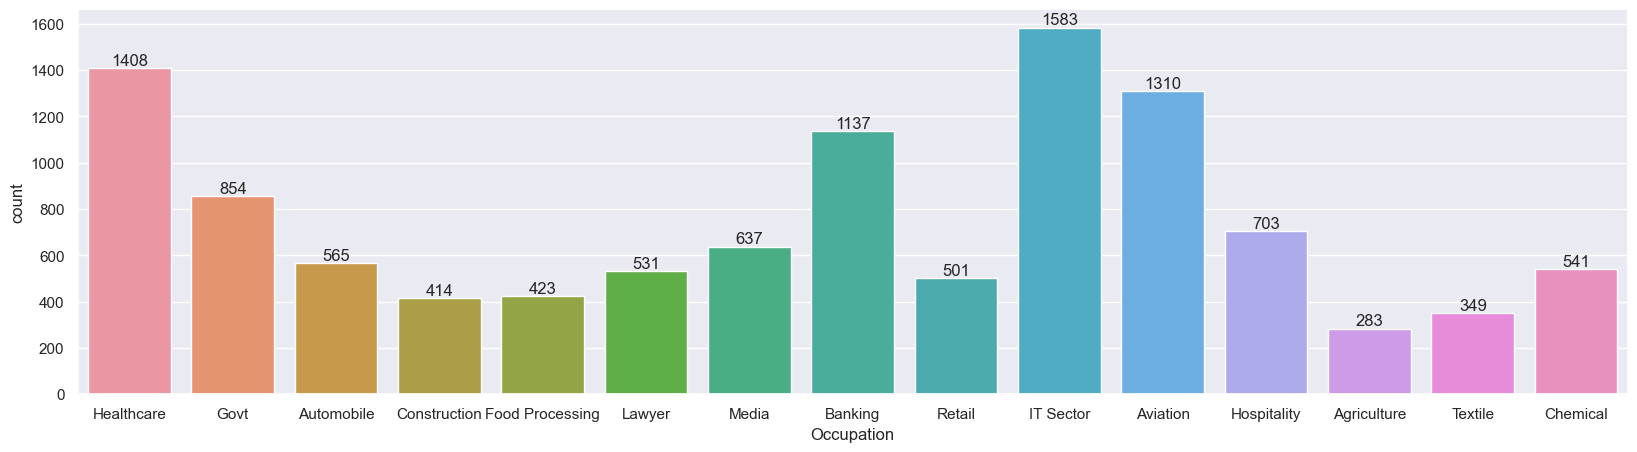

In [57]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

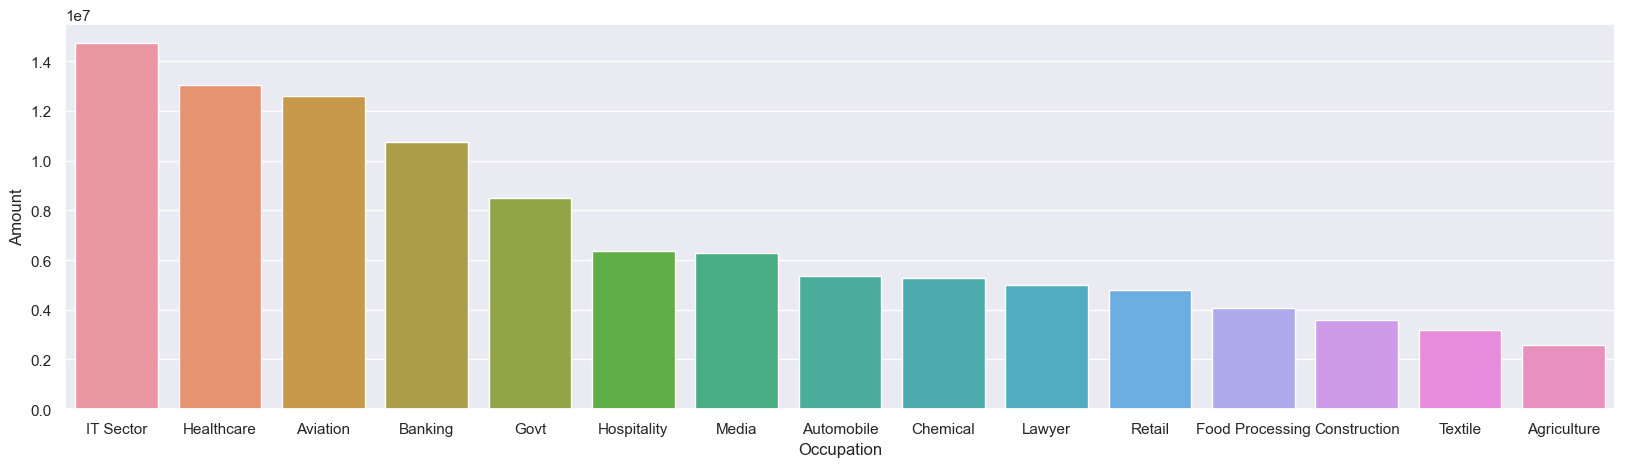

In [65]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.show()

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

## Product Category

![](category.jpg)

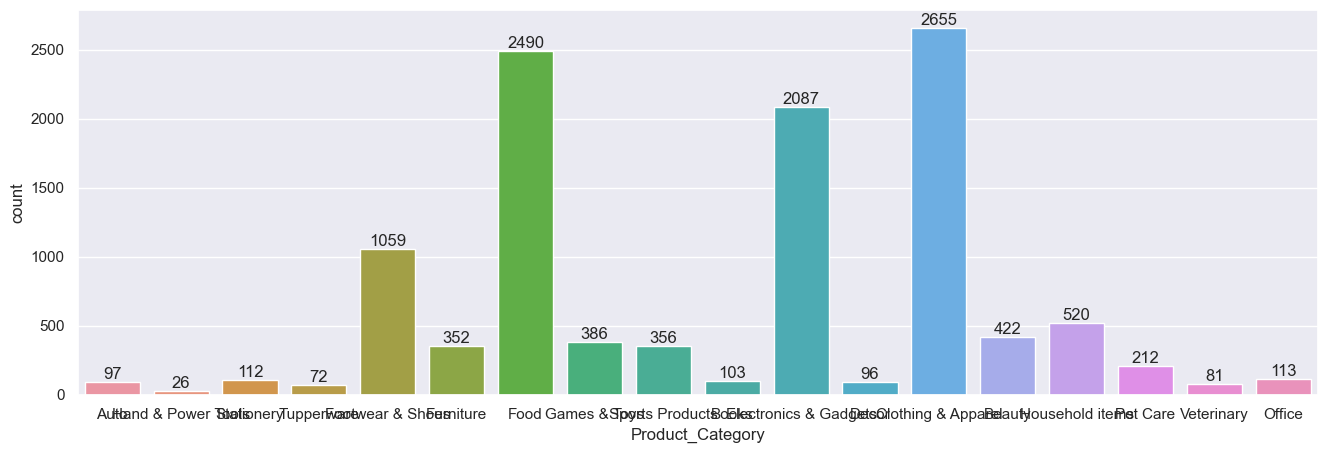

In [67]:
sns.set(rc={'figure.figsize':(16,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

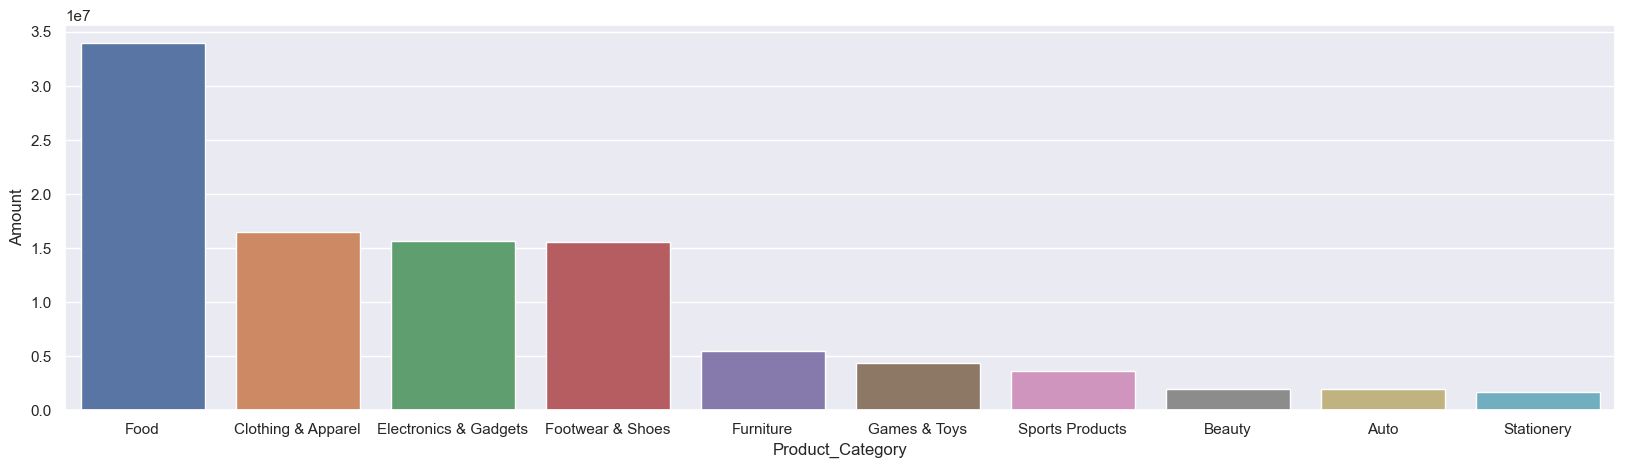

In [64]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
plt.show()

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

## Product ID

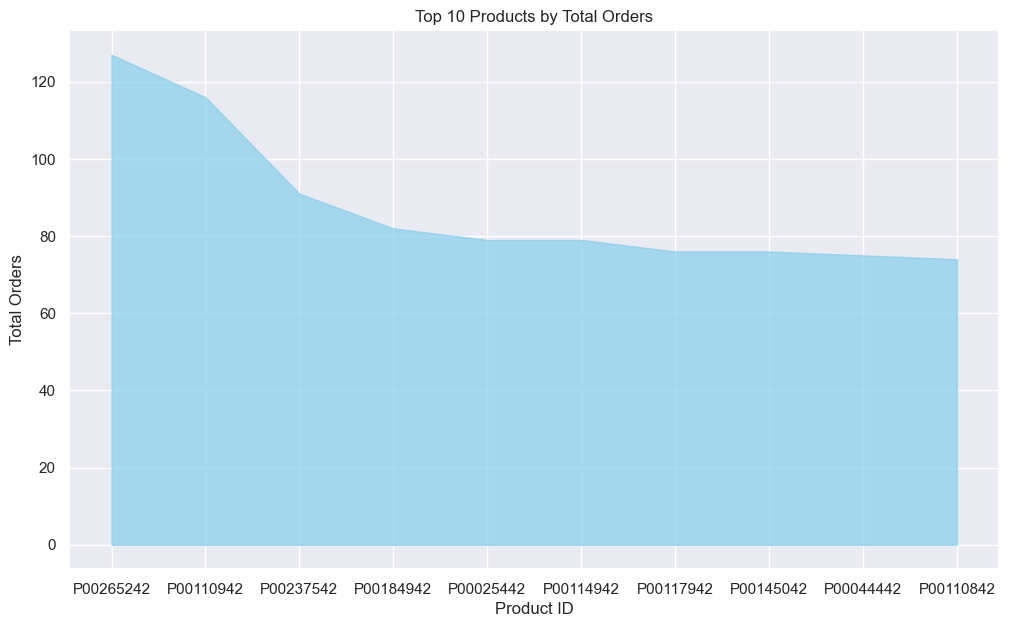

In [55]:
top_products = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False)

fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.fill_between(top_products.index, top_products.values, color='skyblue', alpha=0.7)
ax1.set_xlabel('Product ID')
ax1.set_ylabel('Total Orders')
ax1.set_title('Top 10 Products by Total Orders')
plt.show()

# 4 Conclusion:
 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

Thank you!